In [1956]:
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)


# IMPORT THE DATA AS A DATAFRAME AND CHECK FOR MISSING VALUES

In [1957]:
datastud = pd.read_csv('datastud.csv')
df = pd.read_csv("datastud.csv")
print(df.isnull().sum())

#original dataframe is saved as datastud

school         0
sex            0
address        0
famsize       50
Pstatus        0
Medu           0
Fedu          73
Mjob           0
Fjob           0
reason         0
guardian       0
traveltime    73
failures       0
schoolsup      0
famsup         0
paid           0
activities     0
nursery        0
higher        76
internet       0
famrel         0
freetime      45
goout          0
Dalc           0
health         0
absences      69
G1             0
G2            35
G3             0
Feature_1     38
Feature_2     46
Feature_3     39
romantic       0
dtype: int64


# LEVEL2
##### FILL THE MISSING VALUES OF THE DATAFRAME

#### I filled categorical columns with mode   
#### I filled numerical columns using: Mean and KNNImputer
#### Found that mean and KNN Imputer give similar results, also a very small portion of data is missing, so method of fillling doesn't change the results much



In [1958]:
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer

# Identify numeric columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
'''
# Impute missing values with mean
imputer = SimpleImputer(strategy='mean')
df[num_cols] = imputer.fit_transform(df[num_cols])

# Round to nearest integer and convert to int type
df[num_cols] = df[num_cols].round(0).astype(int)'''


# Apply KNN imputation only on numeric columns
imputer = KNNImputer(n_neighbors=5)
df[num_cols] = imputer.fit_transform(df[num_cols])

# Optional: Round integer-based columns ()
for col in num_cols:
    if col in df.columns:
        df[col] = df[col].round().astype(int)


cat_cols = df.select_dtypes(include='object').columns


from sklearn.impute import SimpleImputer

# Assuming df is your DataFrame and cat_cols is a list of categorical column names
imputer = SimpleImputer(strategy='most_frequent')

# Fit and transform only the categorical columns
df[cat_cols] = imputer.fit_transform(df[cat_cols])

df.head(20)

,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,famrel,freetime,goout,Dalc,health,absences,G1,G2,G3,Feature_1,Feature_2,Feature_3,romantic
0,GP,F,U,GT3,A,4,4,at_home,teacher,course,mother,2,0,yes,no,no,no,yes,yes,no,4,3,4,1,3,4,0,11,11,18,2,1,no
1,GP,F,U,GT3,T,1,1,at_home,other,course,father,2,0,no,yes,no,no,no,yes,yes,5,3,3,1,3,2,9,11,11,17,2,1,no
2,GP,F,U,LE3,T,1,1,at_home,other,other,mother,1,0,yes,no,no,no,yes,yes,yes,4,3,2,2,3,6,12,13,12,15,2,3,no
3,GP,F,U,GT3,T,4,2,health,services,home,mother,1,0,no,yes,no,yes,yes,yes,yes,3,2,2,1,5,0,14,14,14,15,3,1,yes
4,GP,F,U,GT3,T,3,3,other,other,home,father,1,0,no,yes,no,no,yes,yes,no,4,3,2,1,5,0,11,13,13,16,2,2,no
5,GP,M,U,LE3,T,4,3,services,other,reputation,mother,1,0,no,yes,no,yes,yes,yes,yes,5,4,2,1,5,6,12,12,13,16,2,2,no
6,GP,M,U,GT3,T,2,2,other,other,home,mother,1,0,no,no,no,no,yes,yes,yes,4,4,4,1,3,0,13,12,13,16,2,1,no
7,GP,F,U,GT3,A,4,4,other,teacher,home,mother,1,0,yes,yes,no,no,yes,yes,no,4,1,4,1,1,2,10,13,13,17,2,1,no
8,GP,M,U,LE3,A,3,2,services,other,home,mother,1,0,no,yes,no,no,yes,yes,yes,4,2,2,1,1,0,15,16,17,15,2,1,no
9,GP,M,U,GT3,T,3,4,other,other,home,mother,1,0,no,yes,no,yes,yes,yes,yes,5,5,1,1,5,0,12,12,13,15,2,1,no


In [1959]:
fullyfilleddf = df.copy()
fullyfilleddf.to_csv('fullyfilleddf.csv')

fullyfilleddf.shape


(649, 33)

### Convert all categorical columns to numerical using getdummies
##### I did not use OnehotEncoder because it distorts the results of KNNClassifier:
##### For KNN, you can't use one_hot _encoder cause it establishes false realtionships with each other eg: if red is encoded as 0, blue is encoded as 1, green is encoded as 2, it thinks that red and blue are more closely related than red and green.However, this is cap.


In [1960]:

df = pd.get_dummies(df, columns= cat_cols, drop_first= True)
dataframe = df.copy()
df.to_csv('dataframe.csv')

# LEVEL1 
#TIME TO GUESS FEAUTRE 1,2,3, WE CAN DO THIS BY SIMPLY PLOTTING A CORRELATION HEATMAP

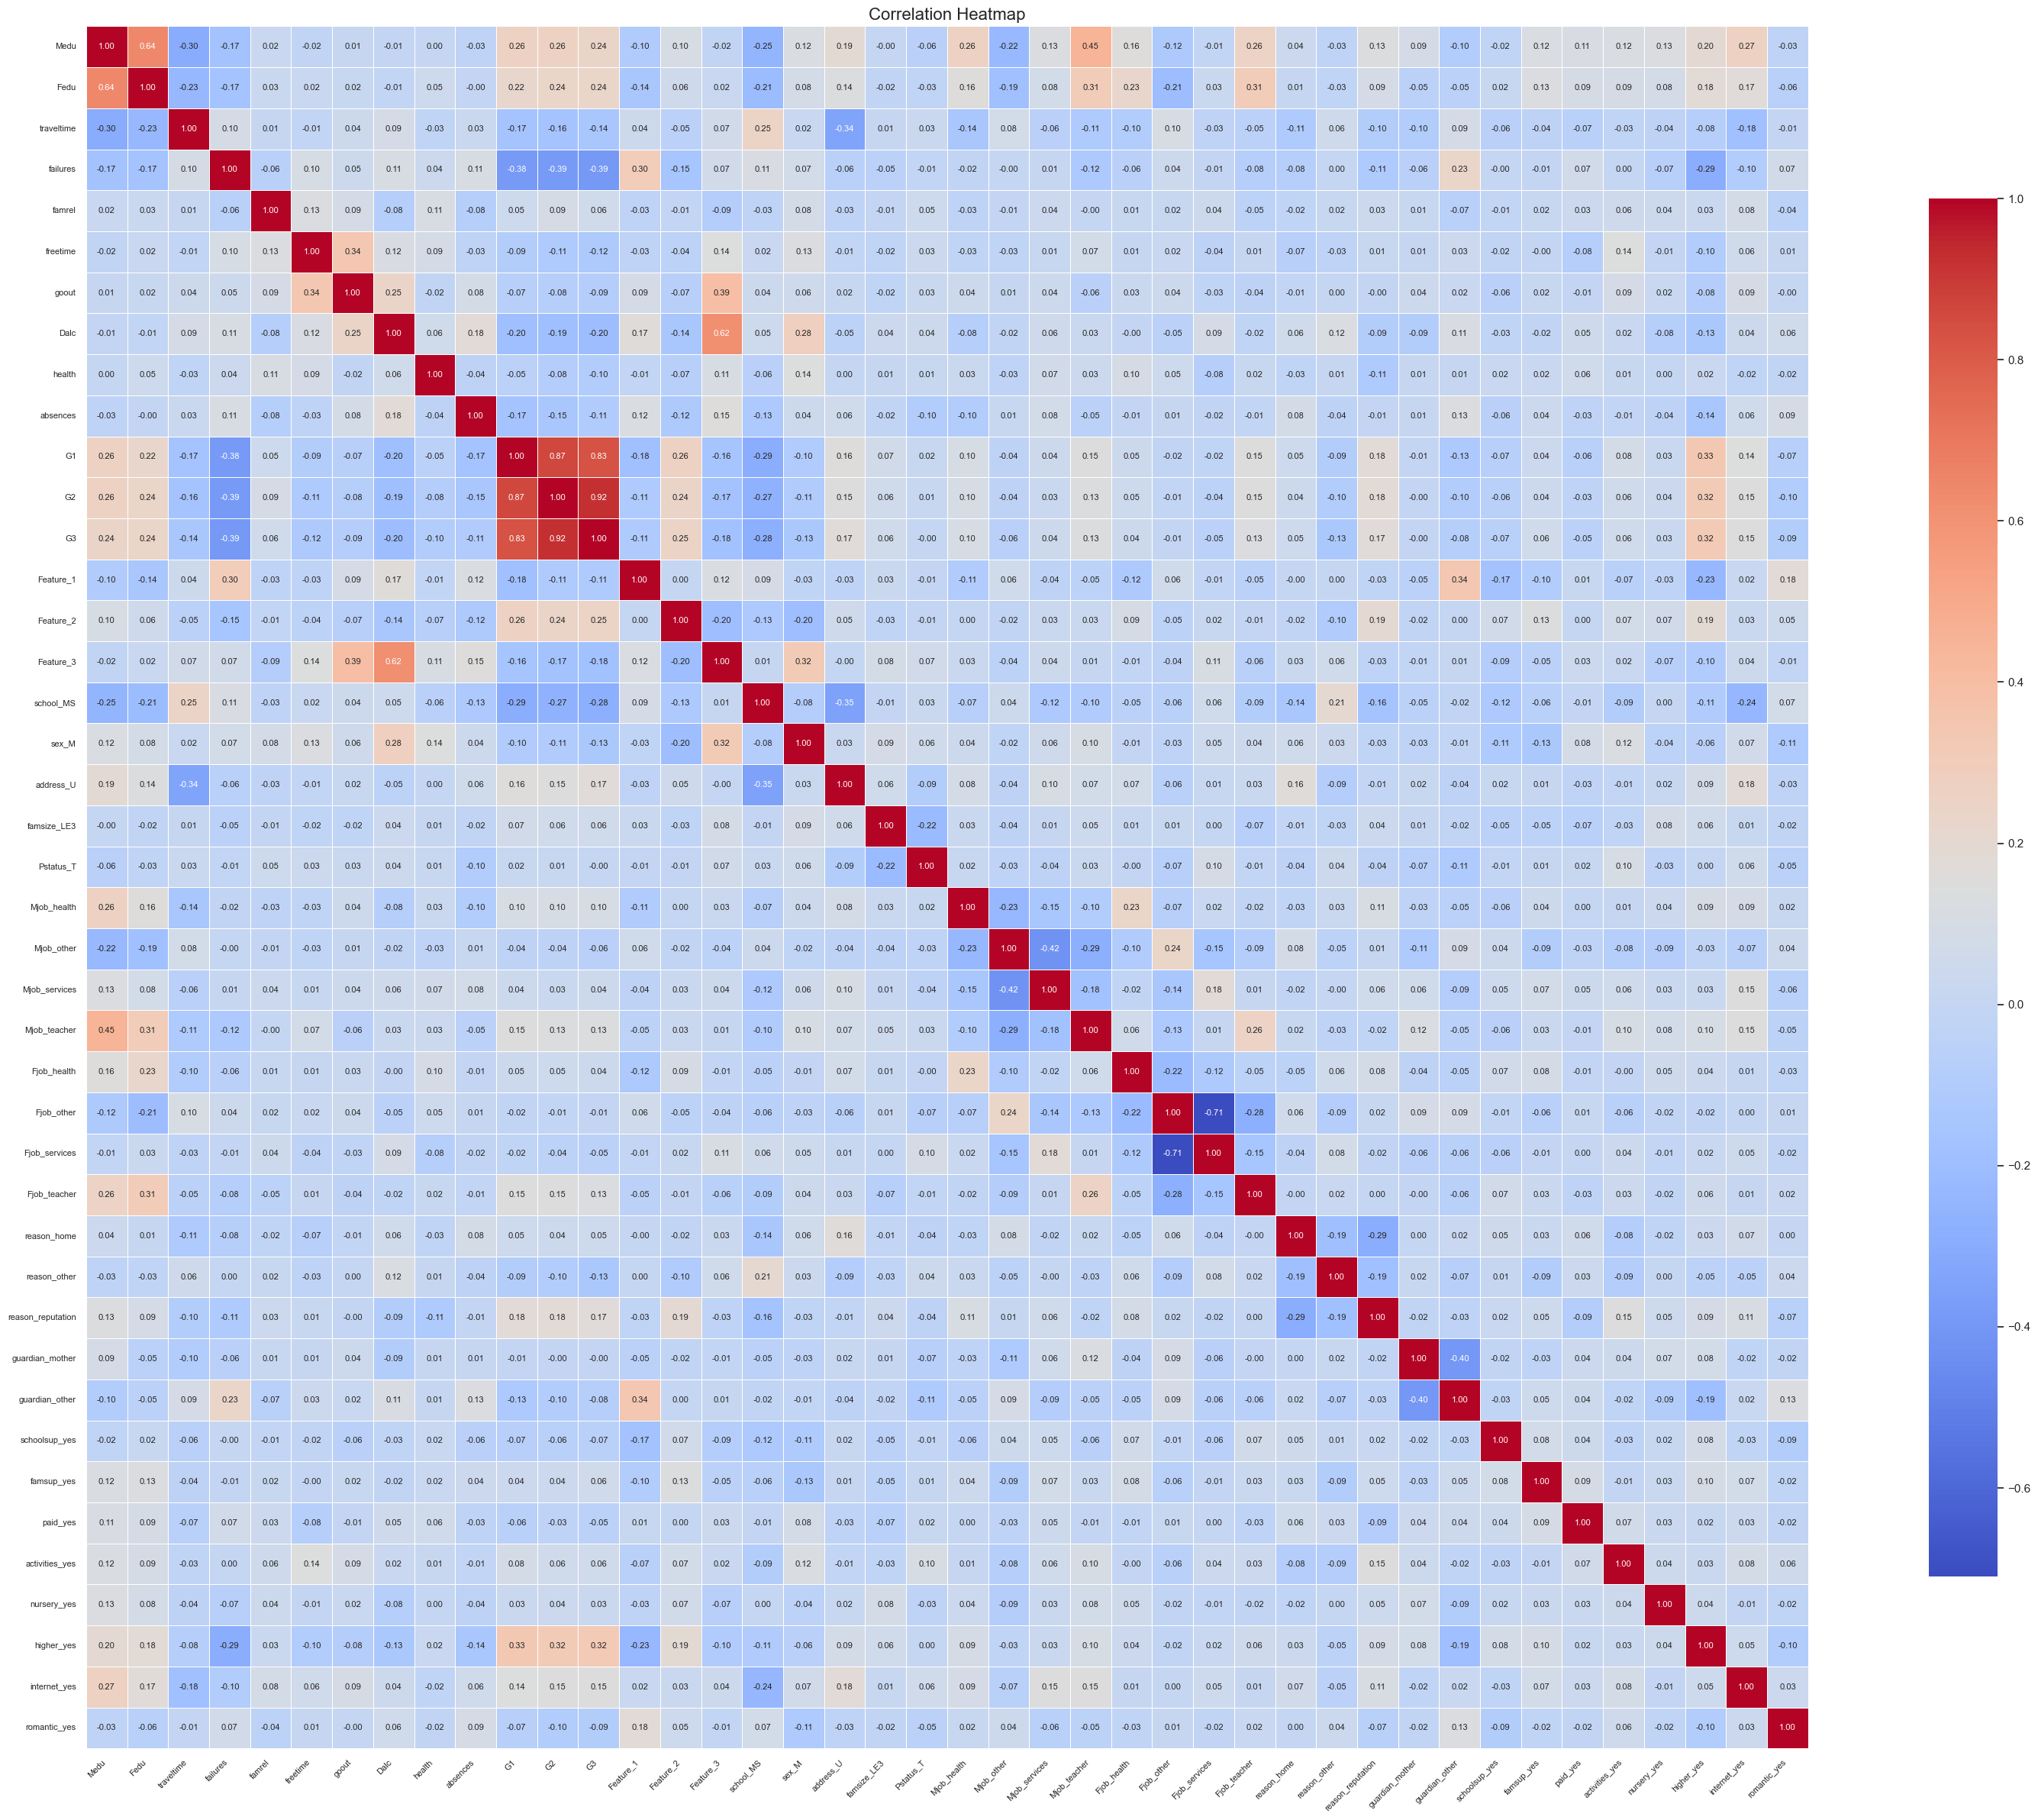

In [1961]:
#NUMBER 1 EDA

corr = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(32, 24))

# Draw the heatmap
sns.heatmap(corr,  annot=True, fmt=".2f", cmap='coolwarm', square=True,
            linewidths=.5, cbar_kws={"shrink": .8}, annot_kws={"size": 8})

# Improve layout and appearance
plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()



### 🔼 ABOVE HEATMAP DEMONSTRATES THAT:
##### FEATURE_1 COULD BE AGE BECUASE OF ITS HIGH CORRELATION WITH GUARDIAN_OTHER, AND THE NUMBERS ARE IN RANGE APPROX 15-20
##### FEATURE_2 COULD BE STUDY HOURS BECAUSE OF ITS HIGH CORRELATION WITH GRADES
##### FEATURE_3 COULD BE DRUG/CIGARETTE/ ANY SUBSTANCE CONSUMPTION BECAUSE OF ITS VERY HIGH CORRELATION  WITH DALC, BEING MALE, AND GOING OUT.

# LEVEL3
#MAKING SOME RANDOM GRAPHS TO EXPLORE THE DATA

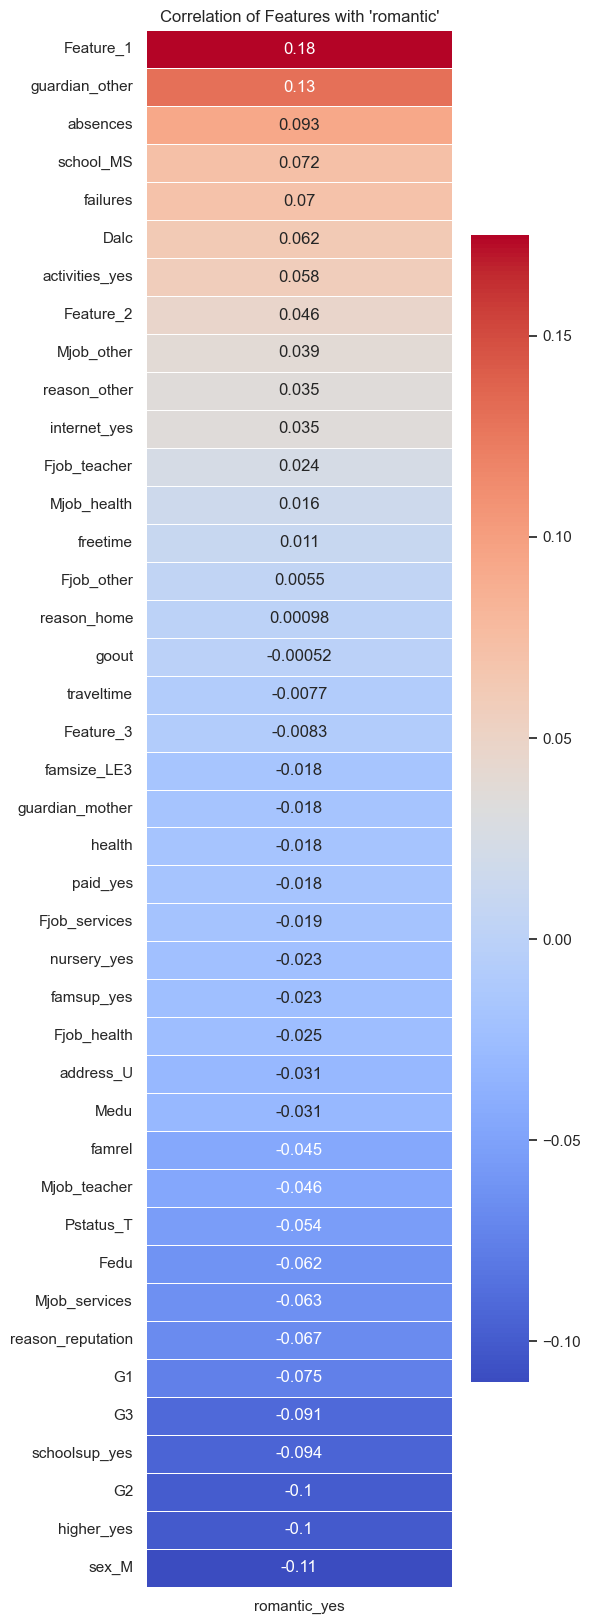

In [1962]:

#NUMBER 2 EDA

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt




# Compute correlation matrix
correlation_matrix = df.corr()

# Extract correlations with 'romantic' column only
romantic_corr = correlation_matrix[['romantic_yes']].drop('romantic_yes')

# Plot heatmap
plt.figure(figsize=(6, len(romantic_corr) * 0.4))
sns.heatmap(romantic_corr.sort_values(by='romantic_yes', ascending=False),
            annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation of Features with 'romantic'")
plt.tight_layout()
plt.show()

### 🔼 Conclusions from above graph:
#### 1. Age (and consequently guardian_other) has the highest correlation to being in a relatiosnhip
#### 2. Being Male has a negative correlation to relationship; probably because males generally start dating at higher ages

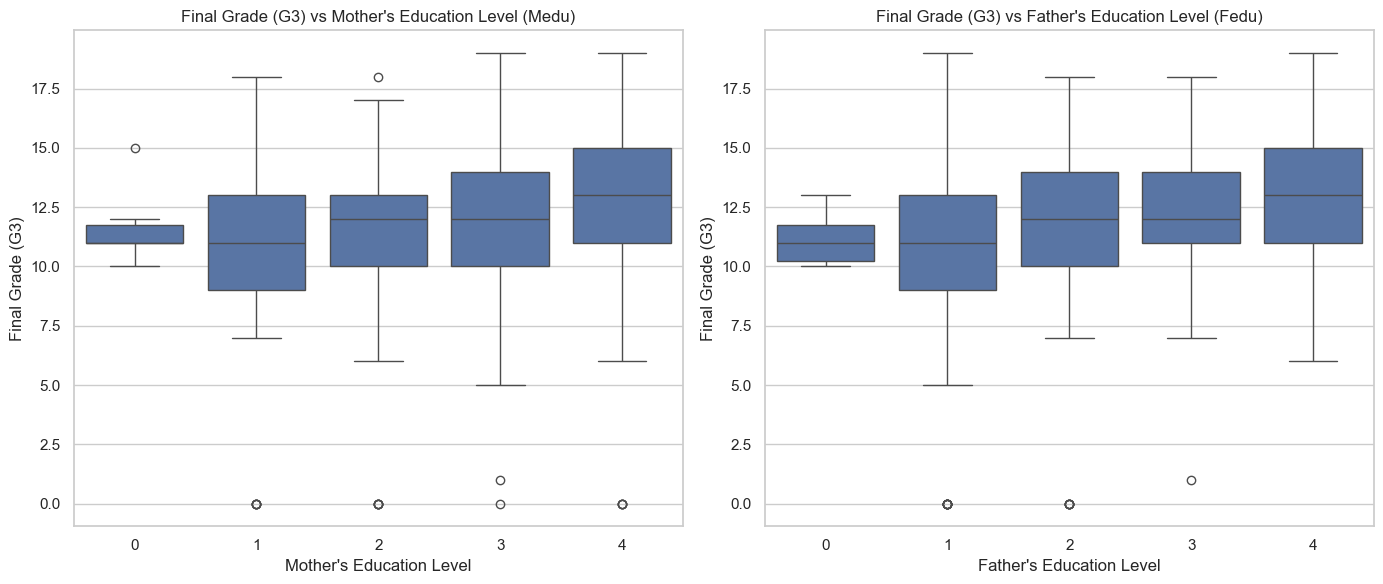

In [1963]:
#NUMBER 3 EDA

sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))

# Mother's education vs G3
plt.subplot(1, 2, 1)
sns.boxplot(x='Medu', y='G3', data=df)
plt.title("Final Grade (G3) vs Mother's Education Level (Medu)")
plt.xlabel("Mother's Education Level")
plt.ylabel("Final Grade (G3)")

# Father's education vs G3
plt.subplot(1, 2, 2)
sns.boxplot(x='Fedu', y='G3', data=df)
plt.title("Final Grade (G3) vs Father's Education Level (Fedu)")
plt.xlabel("Father's Education Level")
plt.ylabel("Final Grade (G3)")

plt.tight_layout()
plt.show()

### 🔼 Conclusions from above graph:
#### 1. Higher educated parents have positive impact on final grade
#### 2. Grade increment of Very High(Level 4) parents with respect to High(level 3) is much more than that of (Level 3) with resp to (Level 2). That is very highly educated parents make sure their kids are doing really well in acads.
#### 3. Mother and Father education is nearly equally important

/var/folders/zv/4wj3qr6x3p58n6_zwsvl6tbm0000gn/T/ipykernel_42289/4121872327.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_df.rename(columns={'Feature_1': 'age'}, inplace=True)
/var/folders/zv/4wj3qr6x3p58n6_zwsvl6tbm0000gn/T/ipykernel_42289/4121872327.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_df['age'] = pd.to_numeric(processed_df['age'], errors='coerce')
/var/folders/zv/4wj3qr6x3p58n6_zwsvl6tbm0000gn/T/ipykernel_42289/4121872327.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

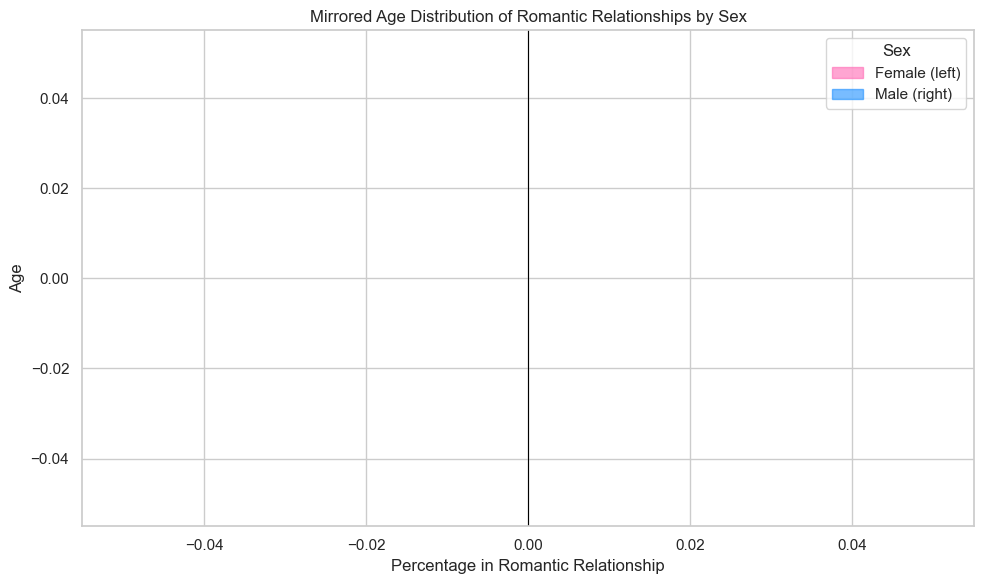

'import pandas as pd\nimport matplotlib.pyplot as plt\nimport seaborn as sns\n\nimport pandas as pd\nimport matplotlib.pyplot as plt\nimport seaborn as sns\n\n# Convert age column to numeric\nfullyfilleddf[\'Feature_1\'] = pd.to_numeric(fullyfilleddf[\'Feature_1\'], errors=\'coerce\')\n\n# Count total and romantic relationship counts per age and sex\ntotal_counts = fullyfilleddf.groupby([\'Feature_1\', \'sex\']).size().reset_index(name=\'total\')\nromantic_counts = fullyfilleddf[fullyfilleddf[\'romantic\'] == \'yes\'].groupby([\'Feature_1\', \'sex\']).size().reset_index(name=\'romantic_yes\')\n\n# Merge and calculate percentages\nmerged = pd.merge(total_counts, romantic_counts, on=[\'Feature_1\', \'sex\'], how=\'left\')\nmerged[\'romantic_yes\'] = merged[\'romantic_yes\'].fillna(0)\nmerged[\'percentage\'] = (merged[\'romantic_yes\'] / merged[\'total\']) * 100\nmerged[\'plot_percentage\'] = merged.apply(\n    lambda row: -row[\'percentage\'] if row[\'sex\'] == \'f\' else row[\'percentag

In [1964]:
#NUMBER 4 EDA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




# Count totals and romantic relationships per age and sex
total_counts = fullyfilleddf.groupby(['Feature_1', 'sex']).size().reset_index(name='total')
romantic_counts = fullyfilleddf[fullyfilleddf['romantic'] == 'yes'].groupby(['Feature_1', 'sex']).size().reset_index(name='romantic_yes')
merged = pd.merge(total_counts, romantic_counts, on=['Feature_1', 'sex'], how='left')
merged['romantic_yes'] = merged['romantic_yes'].fillna(0)
merged['percentage'] = (merged['romantic_yes'] / merged['total']) * 100
merged['plot_percentage'] = merged.apply(
    lambda row: -row['percentage'] if row['sex'] == 'f' else row['percentage'], axis=1)

# Final processing
processed_df = merged[['Feature_1', 'sex', 'plot_percentage']]
processed_df.rename(columns={'Feature_1': 'age'}, inplace=True)
processed_df['age'] = pd.to_numeric(processed_df['age'], errors='coerce')
processed_df['plot_percentage'] = pd.to_numeric(processed_df['plot_percentage'], errors='coerce')
processed_df = processed_df.dropna(subset=['age', 'plot_percentage'])
processed_df = processed_df.sort_values(by='age')

# Plotting
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")
for sex, color in zip(['f', 'm'], ['#FF69B4', '#1E90FF']):
    subset = processed_df[processed_df['sex'] == sex]
    plt.fill_betweenx(
        y=subset['age'],
        x1=0,
        x2=subset['plot_percentage'],
        alpha=0.6,
        label=f'Sex: {sex}',
        color=color
    )

plt.axvline(0, color='black', linewidth=0.8)
plt.xlabel('Percentage in Romantic Relationship')
plt.ylabel('Age')
plt.title('Mirrored Age Distribution of Romantic Relationships by Sex')
plt.legend(title='Sex', labels=['Female (left)', 'Male (right)'])
plt.tight_layout()
plt.show()
'''import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert age column to numeric
fullyfilleddf['Feature_1'] = pd.to_numeric(fullyfilleddf['Feature_1'], errors='coerce')

# Count total and romantic relationship counts per age and sex
total_counts = fullyfilleddf.groupby(['Feature_1', 'sex']).size().reset_index(name='total')
romantic_counts = fullyfilleddf[fullyfilleddf['romantic'] == 'yes'].groupby(['Feature_1', 'sex']).size().reset_index(name='romantic_yes')

# Merge and calculate percentages
merged = pd.merge(total_counts, romantic_counts, on=['Feature_1', 'sex'], how='left')
merged['romantic_yes'] = merged['romantic_yes'].fillna(0)
merged['percentage'] = (merged['romantic_yes'] / merged['total']) * 100
merged['plot_percentage'] = merged.apply(
    lambda row: -row['percentage'] if row['sex'] == 'f' else row['percentage'], axis=1
)

# Clean and rename
processed_df = merged[['Feature_1', 'sex', 'plot_percentage']].copy()
processed_df.rename(columns={'Feature_1': 'age'}, inplace=True)
processed_df['age'] = pd.to_numeric(processed_df['age'], errors='coerce')
processed_df['plot_percentage'] = pd.to_numeric(processed_df['plot_percentage'], errors='coerce')
processed_df = processed_df.dropna(subset=['age', 'plot_percentage'])
processed_df = processed_df.sort_values(by='age')
processed_df.to_csv("proc.csv")'''




### 🔼 Conclusions from above graph:
#### 1. The percentage in romantic relationship is higher for higher ages in males compared to that in females.

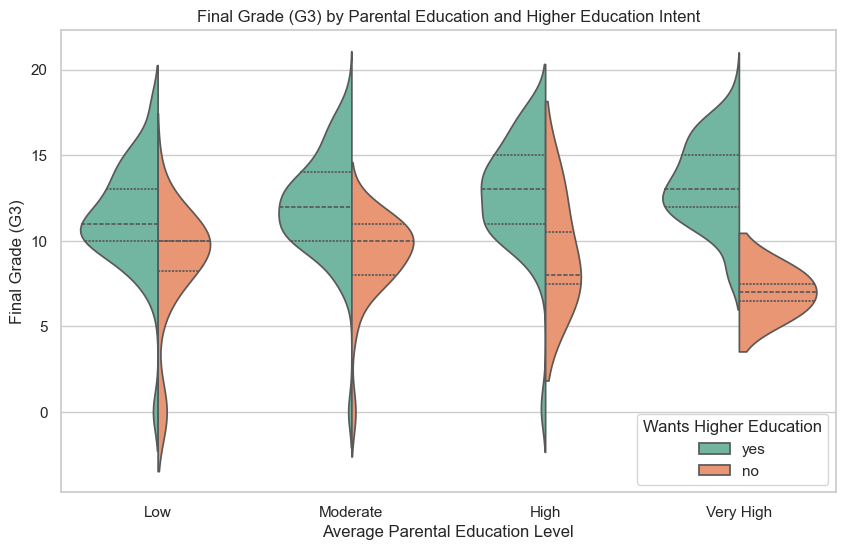

In [1965]:
#NUMBER 5 EDA
fullyfilleddf['avg_parent_edu'] = (fullyfilleddf['Medu'] + fullyfilleddf['Fedu']) / 2
fullyfilleddf['parent_edu_cat'] = pd.cut(fullyfilleddf['avg_parent_edu'], bins=[0, 1.5, 2.5, 3.5, 5], 
                               labels=["Low", "Moderate", "High", "Very High"])

plt.figure(figsize=(10, 6))
sns.violinplot(x="parent_edu_cat", y="G3", hue="higher", data=fullyfilleddf, split=True, inner="quartile", palette="Set2")
plt.title("Final Grade (G3) by Parental Education and Higher Education Intent")
plt.xlabel("Average Parental Education Level")
plt.ylabel("Final Grade (G3)")
plt.legend(title="Wants Higher Education")
plt.show()

### 🔼 Conclusions from above graph:
#### The RHS of each graph(red) can be classified as less ambitious students and LHS(green) can be classified as ambitious
#### 1. Ambitious students perform slightly better than unambitious students
#### 2. As the education level of the parents increases, students are more in sync with their goals That is to say, ambitious kids of highly educated parents do significantly better than unambitious ones. However, for less educated parents, ambitious kids perform only slightly better than unambitious ones.

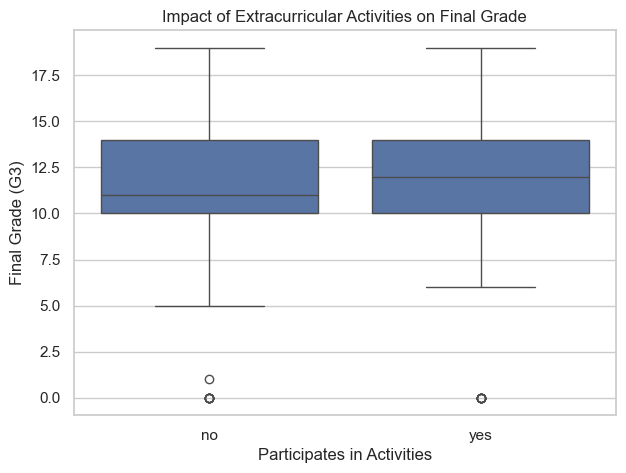

In [1966]:
# NUMBER 5 EDA
plt.figure(figsize=(7, 5))
sns.boxplot(x='activities', y='G3', data=fullyfilleddf)
plt.title("Impact of Extracurricular Activities on Final Grade")
plt.xlabel("Participates in Activities")
plt.ylabel("Final Grade (G3)")
plt.show()


### 🔼 Conclusions from above graph:
#### 1. Extracurricular activity has positive impact on final grade.

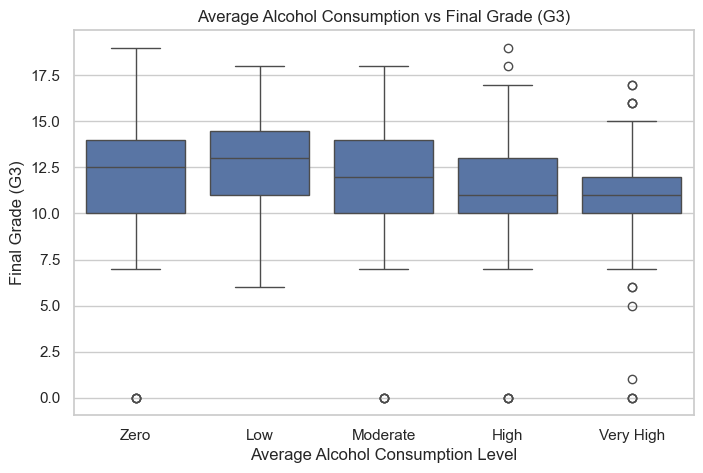

In [1967]:
#NUMBER 6 EDA


fullyfilleddf['avg_alc'] = (fullyfilleddf['Dalc']+fullyfilleddf['Feature_3']) / 2

plt.figure(figsize=(8, 5))
sns.boxplot(x=pd.cut(fullyfilleddf['avg_alc'], bins=[0,1, 1.5, 2, 3, 5], labels=["Zero", "Low", "Moderate", "High", "Very High"]), y='G3', data=fullyfilleddf)
plt.title("Average Alcohol Consumption vs Final Grade (G3)")
plt.xlabel("Average Alcohol Consumption Level")
plt.ylabel("Final Grade (G3)")
plt.show()

### 🔼 Conclusions from above graph:
#### 1. Higher alcohol consumption is linked to lower grades
#### 2. Low alcohol consumers infact did slightly better than zero alc consumers. Therefore, grades only drop for moderate and high consumers. Low consumption has little to no effect on grades.


# LEVEL4
#RUN THE FINAL ALGORITHM AND EVALUATE IT

In [1968]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

#I dropped a bunch of feature that were ocrrelated to each other, or they had very less correlation with romantic, 
# I didnt have much success with this approach

'''X = df.drop(columns =['traveltime', 'failures', 
        'health', 'absences', 'G1', 'G2', 'G3', 
       'Feature_2', 'school_MS', 'reason_home', 'reason_other',
       'reason_reputation', 'guardian_mother', 'guardian_other',
       'schoolsup_yes', 'famsup_yes', 'paid_yes','nursery_yes', 'higher_yes', 'romantic_yes'], axis =1)
y = df['romantic_yes']'''

# I did some feature engineeering, combined some features into a single feature and also dropped few columns.
# This gave a slight improvement in accuracy scores.
df['avg_edu'] = (df['Fedu']+df['Medu'])/2
df['avg_grade'] = (df['G1'] + df['G2'] + df['G3']) / 3
df['social_life'] = df['goout'] + df['freetime']
df['drugs'] = df['Dalc'] + df['Feature_3']
X = df.drop(columns =["romantic_yes", "Fjob_health","paid_yes",
"Mjob_teacher","Fjob_teacher","Mjob_health","schoolsup_yes","higher_yes","reason_reputation"
,"reason_other","Fedu", "Medu", "G1","G2", "G3", "goout", "freetime", "Dalc", "Feature_3","traveltime",
"schoolsup_yes", "famsup_yes"], axis=1)
y = df["romantic_yes"]
'''
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=69)'''



#I used stratified splitting, this bumped the accurace from around 65 to around 72.
skf = StratifiedKFold(n_splits=8, shuffle=True, random_state=69)

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    break  






#MODEL1 RANDOMFOREST

# Initialize and train model
model1 = RandomForestClassifier(random_state=43)
model1.fit(X_train, y_train)

# Predictions
y_pred = model1.predict(X_test)

# Evaluation
m1_acc =accuracy_score(y_test, y_pred)
print("Accuracy:",round(m1_acc,2))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


#MODEL2 KNN

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Prediction Classifier ----
model2 = KNeighborsClassifier(n_neighbors=6)
model2.fit(X_train_scaled, y_train)

# Evaluation ----
y_pred = model2.predict(X_test_scaled)

m2_acc =accuracy_score(y_test, y_pred)
print("Accuracy:", round(m2_acc,2))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


#MODEL3 LOGISTIC REGRESSION


model3 = LogisticRegression()
model3.fit(X_train,y_train)

y_pred  = model3.predict(X_test)


m3_acc =accuracy_score(y_test, y_pred)
print("Accuracy:", round(m3_acc,2))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))




Accuracy: 0.67

Confusion Matrix:
[[47  5]
 [22  8]]

Classification Report:
              precision    recall  f1-score   support

       False       0.68      0.90      0.78        52
        True       0.62      0.27      0.37        30

    accuracy                           0.67        82
   macro avg       0.65      0.59      0.57        82
weighted avg       0.66      0.67      0.63        82

Accuracy: 0.72

Confusion Matrix:
[[50  2]
 [21  9]]

Classification Report:
              precision    recall  f1-score   support

       False       0.70      0.96      0.81        52
        True       0.82      0.30      0.44        30

    accuracy                           0.72        82
   macro avg       0.76      0.63      0.63        82
weighted avg       0.75      0.72      0.68        82

Accuracy: 0.7

Confusion Matrix:
[[50  2]
 [23  7]]

Classification Report:
              precision    recall  f1-score   support

       False       0.68      0.96      0.80        52
       

/Users/pranavprabhukumble/Desktop/Random/VSCODE/ML/mlvenv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##### First, I tried normal splitting and normal running models. This gave an accuracy of around 62 percent.
##### Then i did some feature engineering with two approaches, turned out combining multiple features into one feature was better than entirely dropping the feature. This brought the accurae to around 65 percent.
##### THen I used stratified splitting this bumped up the accuracy to around 73 percent.
##### Explanation of stratified splitting: Stratified K Folding has two components: 
##### a) K-fold cross validation: What this does is splits the data into K segemnts. It then runs a loop that uses the kth segment as validation data and the remaining k-1 as training data. The results from these k operations are combined to give a model. Now, the problem with this is if most of the values of romantic(say 90%) are no, most of the k segments will have fully no, and this will distort the result a lot. This is where stratifies k-folding comes into picture.
##### b)Stratified K-fold: WHat this does is makes sure the ratio of romantic_yes and romantic_no remains nearly uniform in each of the k segments of data. this greatly helps the model 

# LEVEL5
#EXPLAINIBILITY AND SHAP

/Users/pranavprabhukumble/Desktop/Random/VSCODE/ML/mlvenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


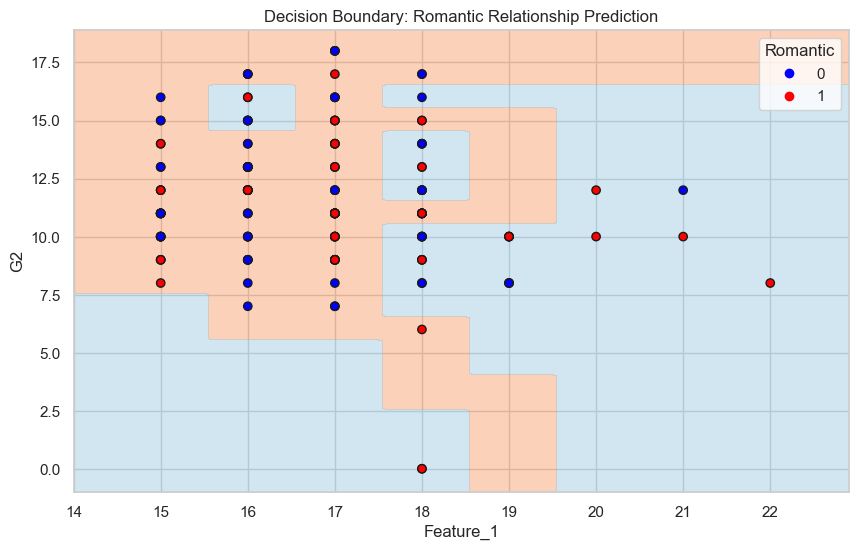

In [1969]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 1: Prepare the data
X = dataframe.drop(columns=['romantic_yes'])  # Features
y = dataframe['romantic_yes']                # Target

# Step 2: Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Step 3: Fit classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Step 4: Visualize decision boundary with 2 features
f1 = 'Feature_1'
f2 = 'G2'

def plot_decision_boundary(model, X, y, feature1, feature2):
    x_min, x_max = X[feature1].min() - 1, X[feature1].max() + 1
    y_min, y_max = X[feature2].min() - 1, X[feature2].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='RdYlBu')
    scatter = plt.scatter(X[feature1], X[feature2], c=y, cmap='bwr', edgecolor='k')
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.title("Decision Boundary: Romantic Relationship Prediction")
    plt.legend(*scatter.legend_elements(), title="Romantic")
    plt.show()

# Train a model only on 2 features to visualize decision boundary
model_2D = RandomForestClassifier(random_state=42)
model_2D.fit(X_train[[f1, f2]], y_train)

plot_decision_boundary(model_2D, X_test[[f1, f2]], y_test, f1, f2)


/Users/pranavprabhukumble/Desktop/Random/VSCODE/ML/mlvenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


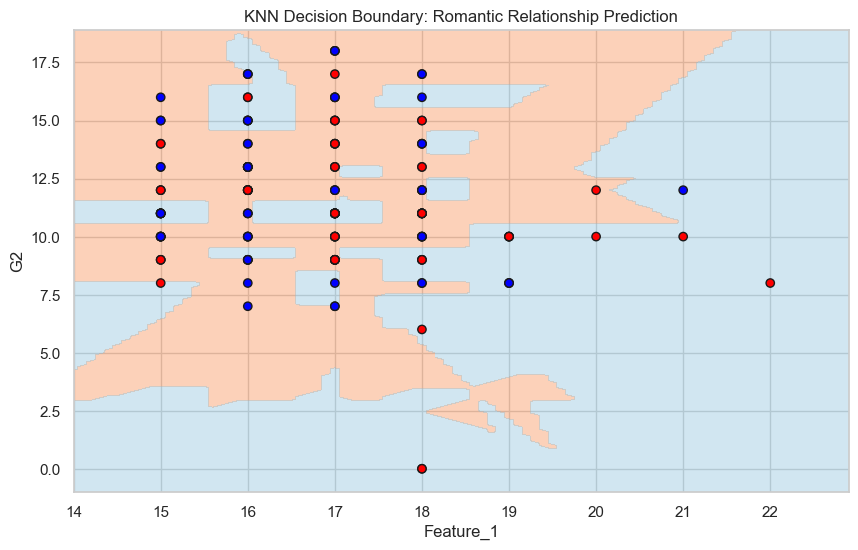

In [1970]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 1: Prepare the data
X = dataframe.drop(columns=['romantic_yes'])  # dataframe
y = dataframe['romantic_yes']                # Target

# Step 2: Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Step 3: Select the 2D features
f1 = 'Feature_1'
f2 = 'G2'

# Step 4: Scale the two selected features
scaler = StandardScaler()
X_train_2D = scaler.fit_transform(X_train[[f1, f2]])
X_test_2D = scaler.transform(X_test[[f1, f2]])

# Step 5: Train KNN on only 2 features
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_2D, y_train)

# Step 6: Plot decision boundary
def plot_decision_boundary_knn(model, X_scaled, y, scaler, X_orig, feature1, feature2):
    # Set limits based on test set (X_orig)
    x_min, x_max = X_orig[feature1].min() - 1, X_orig[feature1].max() + 1
    y_min, y_max = X_orig[feature2].min() - 1, X_orig[feature2].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Scale mesh grid points
    mesh_scaled = scaler.transform(np.c_[xx.ravel(), yy.ravel()])
    Z = model.predict(mesh_scaled)
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='RdYlBu')

    # Use only test points to match 'y'
    plt.scatter(X_orig[feature1], X_orig[feature2], c=y, cmap='bwr', edgecolor="k")
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.title("KNN Decision Boundary: Romantic Relationship Prediction")
    plt.show()


plot_decision_boundary_knn(knn, X_test_2D, y_test, scaler, X_test[[f1, f2]], f1, f2)



##### Unfortunately, couldn't understand and complte Shap properly 🥲